In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('/kaggle/input/world-population-by-year/WorldPopulation.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        70 non-null     int64  
 1   Population  70 non-null     int64  
 2   ChangePerc  70 non-null     float64
 3   NetChange   70 non-null     int64  
 4   Density     70 non-null     int64  
 5   Urban       70 non-null     int64  
 6   UrbanPerc   70 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 4.0 KB


In [6]:
df.describe()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
count,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000
mean,1985.500000,5.002010e+09,1.616429,7.511954e+07,33.557143,2.226815e+09,42.200000
std,20.351085,1.594877e+09,0.321288,1.256972e+07,10.723989,1.070191e+09,7.447595
min,1951.000000,2.584034e+09,1.050000,4.674740e+07,17.000000,7.750677e+08,30.000000
25%,1968.250000,3.570120e+09,1.262500,7.314225e+07,24.000000,1.294408e+09,36.000000
50%,1985.500000,4.915745e+09,1.770000,7.942852e+07,33.000000,2.035272e+09,41.500000
75%,2002.750000,6.361332e+09,1.847500,8.356683e+07,42.750000,3.054260e+09,48.000000
max,2020.000000,7.794799e+09,2.090000,9.290386e+07,52.000000,4.378994e+09,56.000000


In [7]:
df.head()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [ ]:
Some Exploratory Data Analysis

In [8]:
# no missing data
df.isnull().sum()

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Population'>

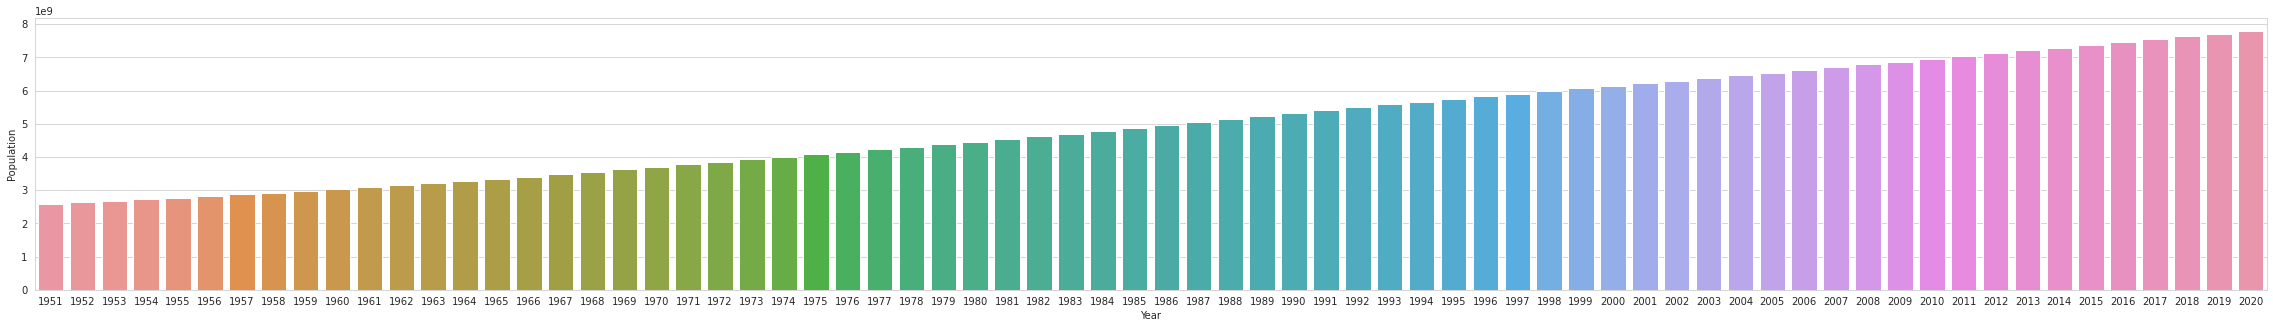

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize = (40,5))
sns.barplot(x = 'Year', y = 'Population', data = df)
# growth trend appears to be linear

<AxesSubplot:xlabel='Year', ylabel='Population'>

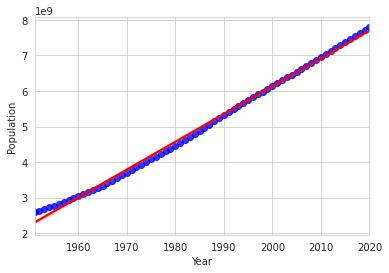

In [10]:
sns.regplot(x = 'Year', y = 'Population', data = df,\
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# for a prediction of future population, we'll use linear regression

<AxesSubplot:xlabel='Year', ylabel='NetChange'>

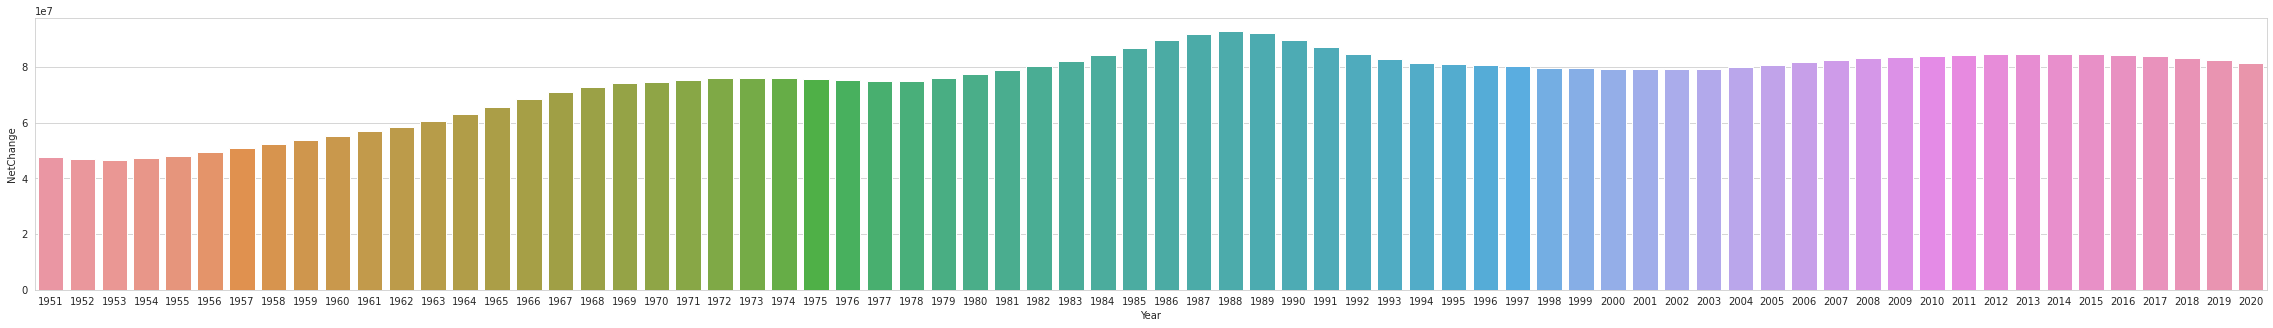

In [11]:
plt.figure(figsize = (40, 5))
sns.barplot(x = 'Year' , y = 'NetChange', data = df)
# largest netchange in world population occured in 1988
# 2020 is the smallest net change since

<AxesSubplot:xlabel='Year', ylabel='NetChange'>

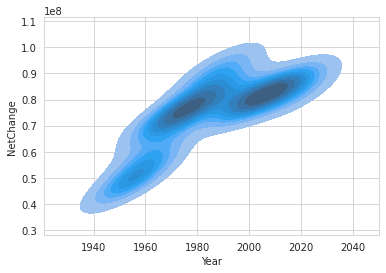

In [13]:
# peaks in net change by year. The early 2000's peak is difficult
#to see in the above bar plot
sns.kdeplot(x = 'Year', y = 'NetChange', data = df, fill = True)

<AxesSubplot:xlabel='Year', ylabel='ChangePerc'>

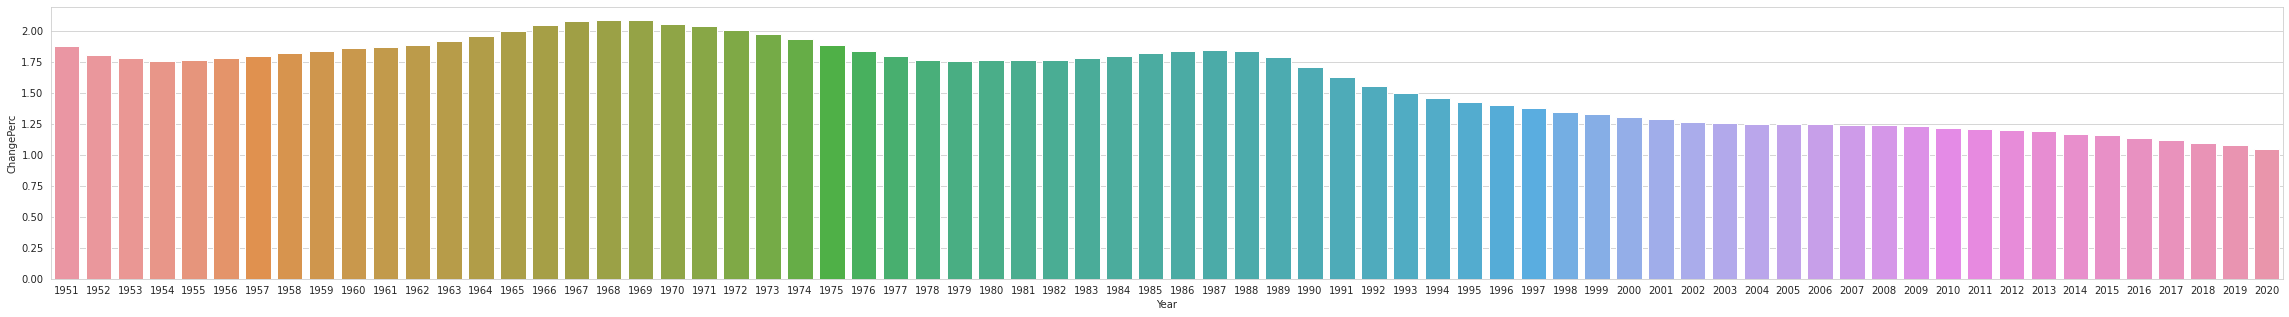

In [14]:
plt.figure(figsize = (40, 5))
sns.barplot(x = 'Year', y = 'ChangePerc', data =df)
# two blips in late sixties and eighties are interesting. Also, the supposed 2008 slump 
# in the US does not appear in the world.

<AxesSubplot:xlabel='Year', ylabel='Density'>

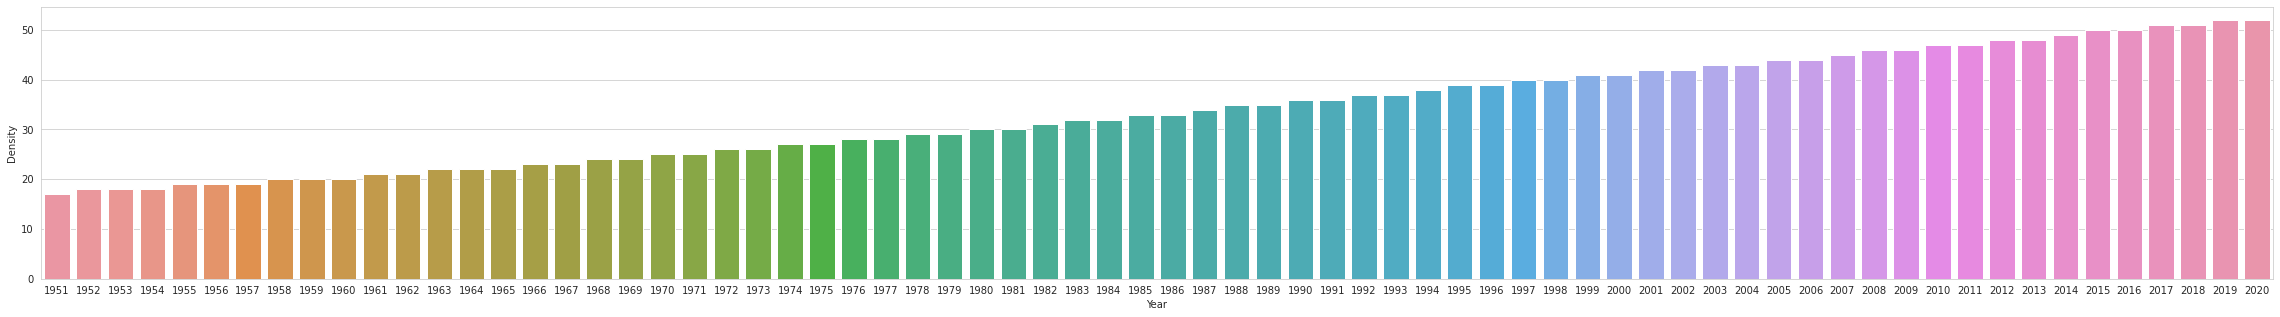

In [15]:
plt.figure(figsize = (40, 5))
sns.barplot(x = 'Year', y = 'Density', data =df)
# upward trend in pop. density likely due to people increasingly moving to urban areas...

<AxesSubplot:xlabel='Year', ylabel='Urban'>

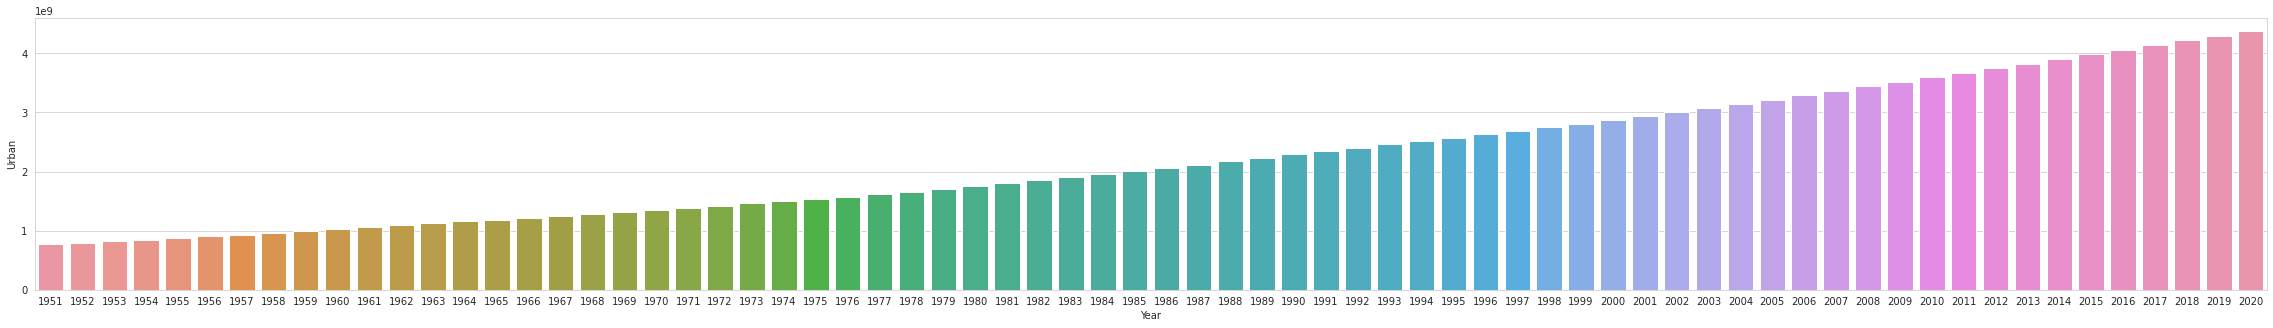

In [16]:
plt.figure(figsize = (40, 5))
sns.barplot(x = 'Year', y = 'Urban', data =df)
# Our hypothesis above is now supported

<AxesSubplot:xlabel='Year', ylabel='UrbanPerc'>

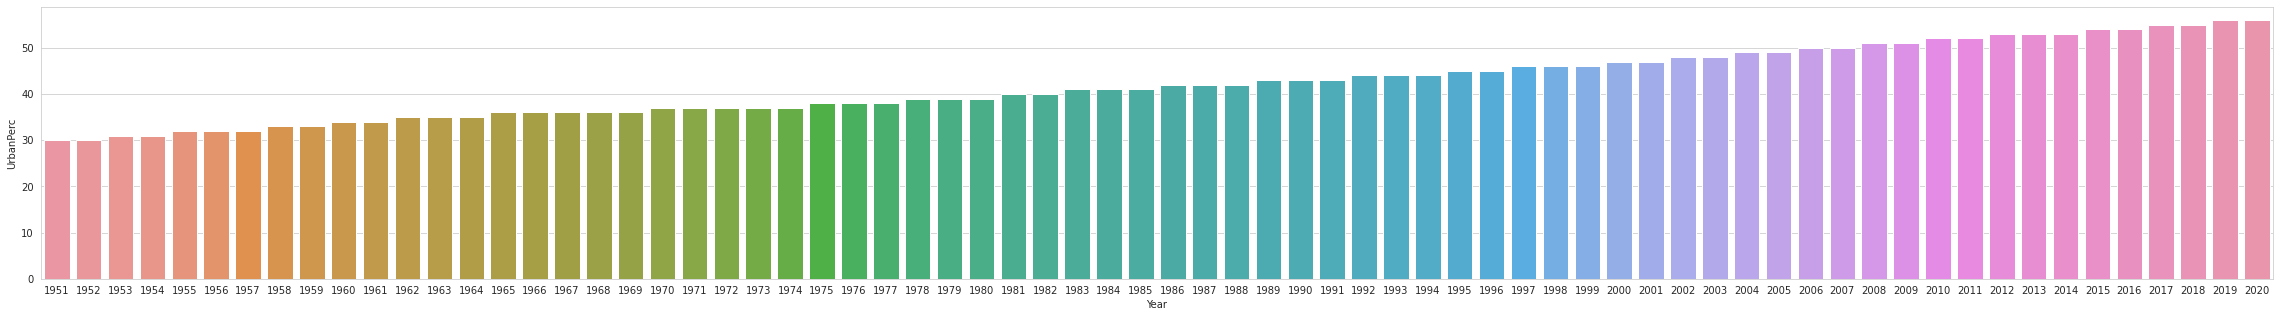

In [17]:
plt.figure(figsize = (40, 5))
sns.barplot(x = 'Year', y = 'UrbanPerc', data =df)

<AxesSubplot:>

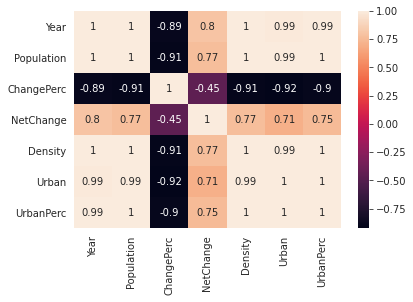

In [18]:
sns.heatmap(df.corr(),annot = True)
# many exact correlations between data features. We may have to remove some of these from
# the dataset in order to train a model to predict future population.
# Are we to think that the net change in population in the 2000s remains strong because
# people are living longer? Would the effects of COVID show up here? 

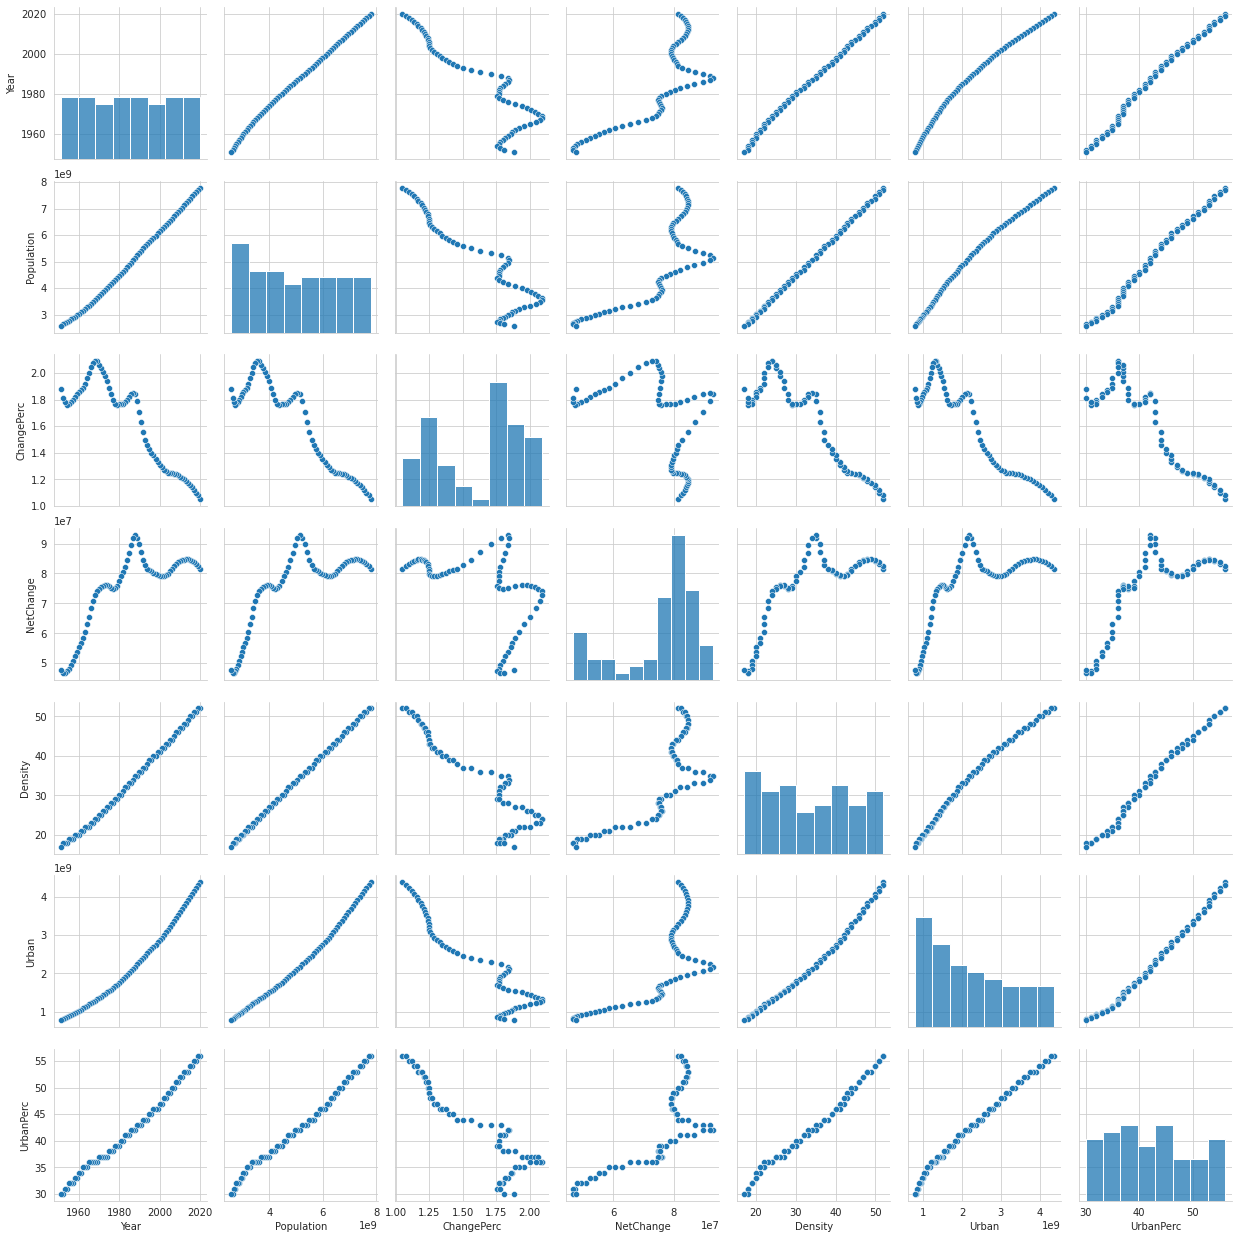

In [19]:
sns.pairplot(df)

In [51]:
# setting X and y variables
X = df.drop('Population', axis = 1).values
y = df['Population'].values

In [52]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
# dimentions of X and y datasets after train-test split
print(X_train.shape)
print('\n')
print(X_test.shape)
print('\n')
print(y_train.shape)
print('\n')
print(y_test.shape)


(49, 6)


(21, 6)


(49,)


(21,)


In [41]:
# rescaling data. Note we only fit on the training data to prevent data leakage.
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train.reshape(-1,1))
#X_test = scaler.transform(X_test)
#y_test = scaler.transform(y_test.reshape(-1,1))

In [53]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [54]:
# training model
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
print('Coefficients',lm.coef_)

Coefficients [ 3.11916637e+07 -5.73885161e+08  1.05123033e+01  2.74442749e+07
  4.45364209e-01 -1.00313135e+07]


In [56]:
# predictions on test set based on trained model
predictions = lm.predict(X_test)

In [77]:
print(lm.score(X_test, y_test)*100)
# 99.979 % model accuracy

99.97918053131625


<AxesSubplot:>

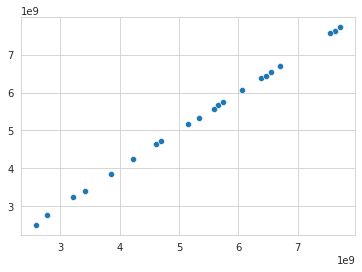

In [58]:
#How well did the model do? Scatter plot of predicitons and actual y_test values should be
# be a line
sns.scatterplot(x = y_test, y = predictions)
# model looks good. We can dig a bit further into the model

In [59]:
# model assessed through mean absolute error, mean squared error and root mean
# squared error
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14482979.745636713
MSE: 487027992043612.0
RMSE: 22068710.701887686


In [64]:
# These errors seem pretty big. Let's check them against the population of the
# world in the year 2020
np.sqrt(metrics.mean_squared_error(y_test, predictions))/df[df['Year'] == 2020]['Population']
# our RMSE is 0.2% of the world population in the year 2020 - not bad!

0    0.002831
Name: Population, dtype: float64

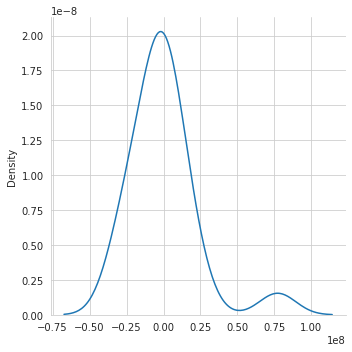

In [74]:
# now let's look at our residuals
sns.displot(y_test - predictions, kind = 'kde')
# reasonable distribution of errors